In [1]:
!mkdir -p /root/.kaggle

In [2]:
import shutil
shutil.move('kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [3]:
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d janiobachmann/bank-marketing-dataset

Dataset URL: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
License(s): CC0-1.0
  0% 0.00/142k [00:00<?, ?B/s]
100% 142k/142k [00:00<00:00, 597MB/s]


In [6]:
!unzip /content/bank-marketing-dataset.zip

Archive:  /content/bank-marketing-dataset.zip
  inflating: bank.csv                


In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
#create data drame to read data set
df=pd.read_csv("/content/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [13]:
# check the df structe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
# find number of rows and column
df.shape

(11162, 17)

In [15]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [16]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


**Find Missing** **values**

In [17]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


**3. Find Features with One Value**

In [18]:
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


**4. Explore the Categorical Features**

In [19]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [20]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


**5. Find Categorical Feature Distribution**

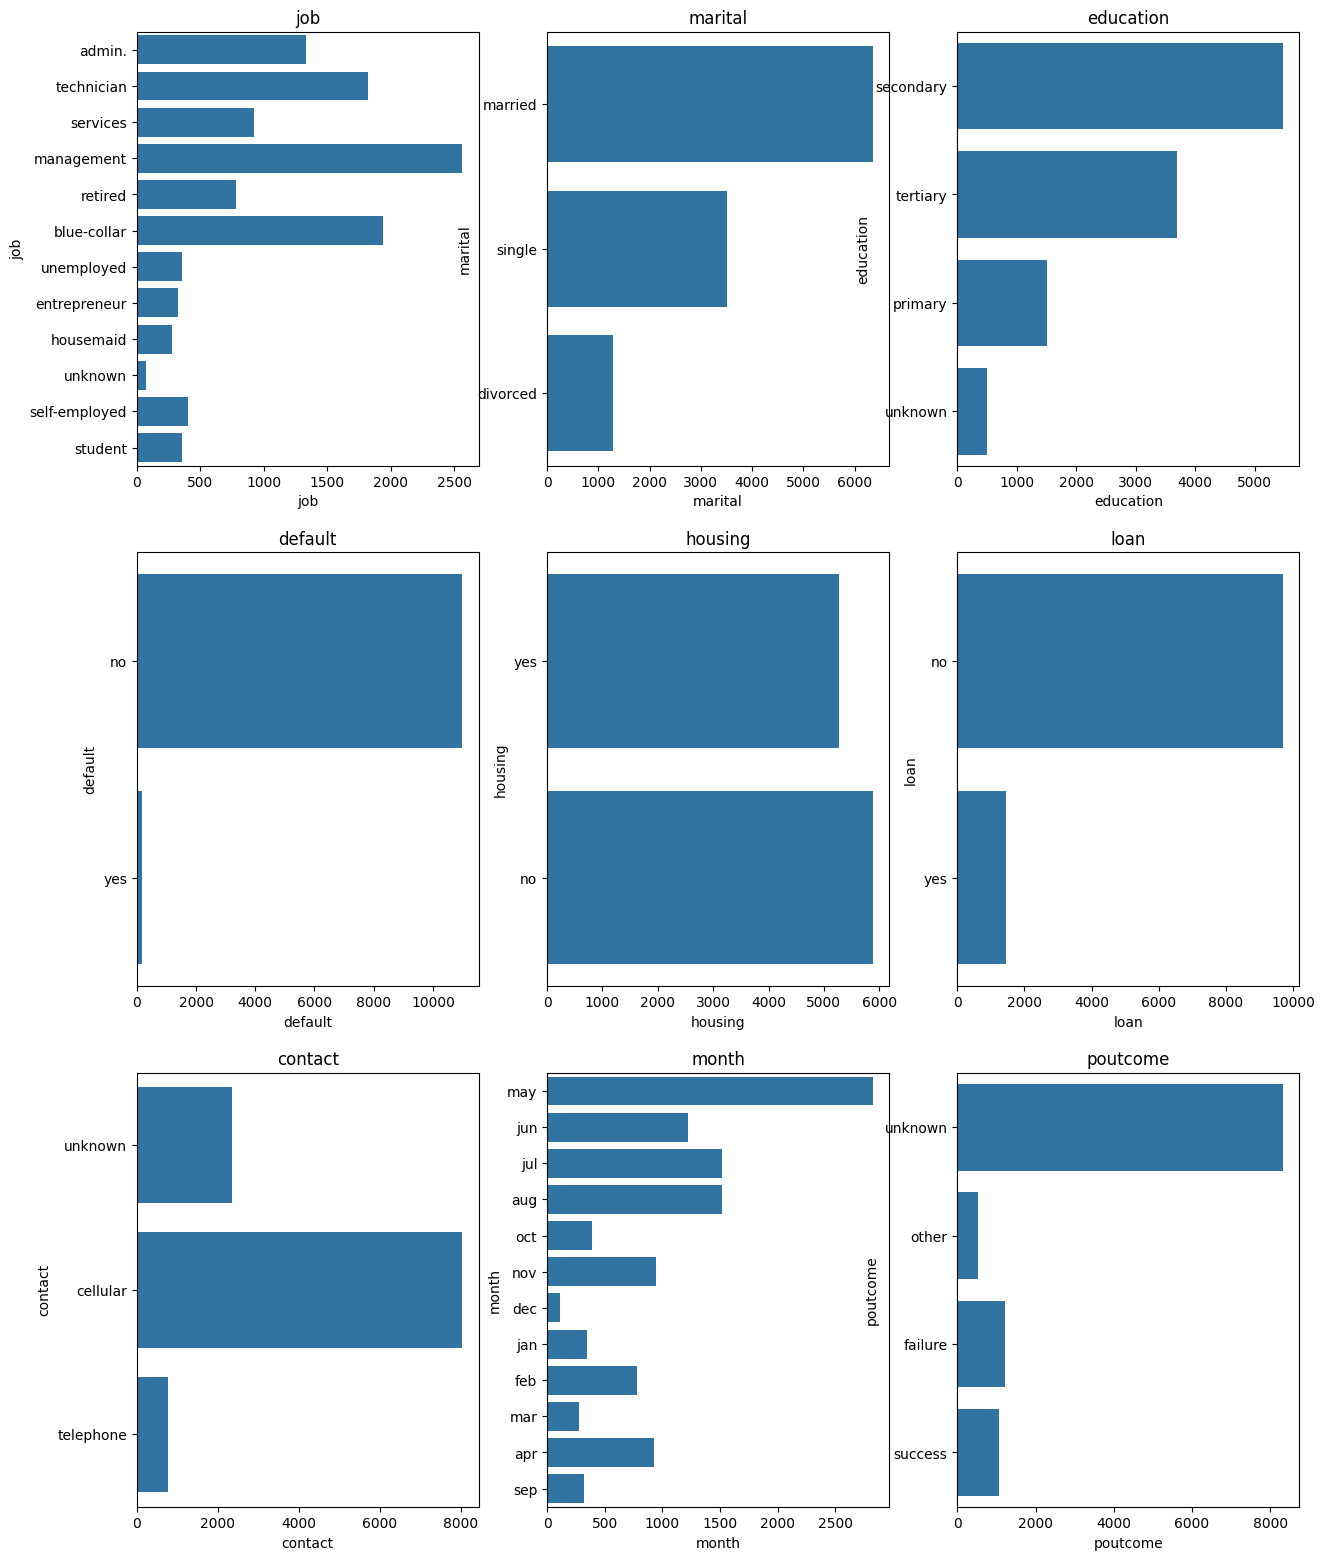

In [23]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**6. Relationship between Categorical Features and Label**

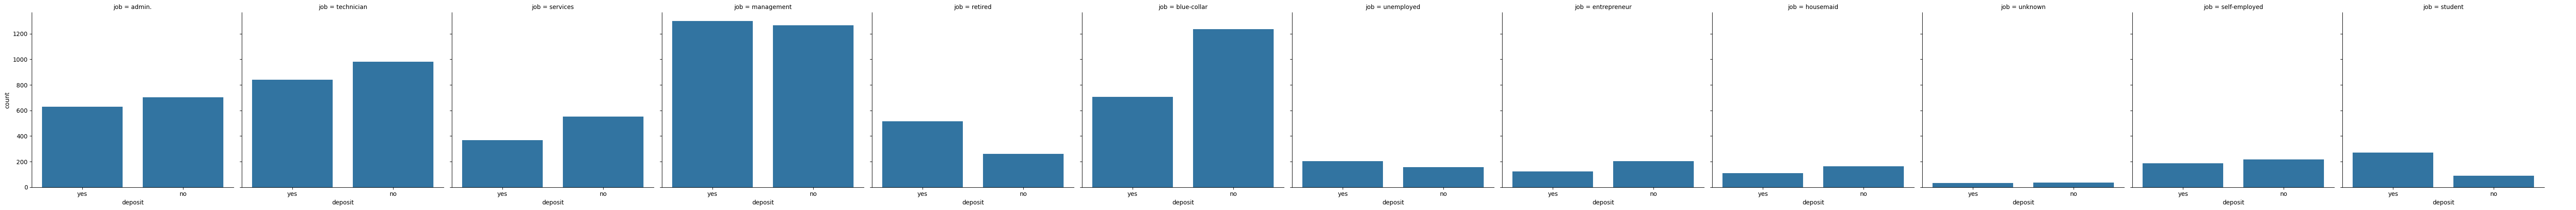

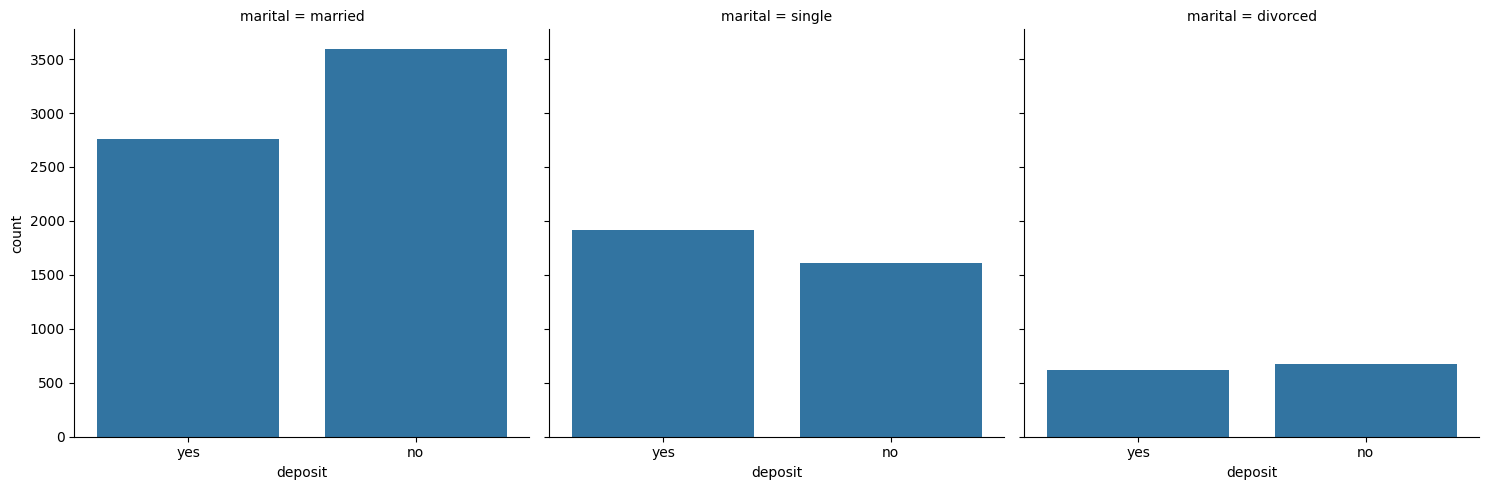

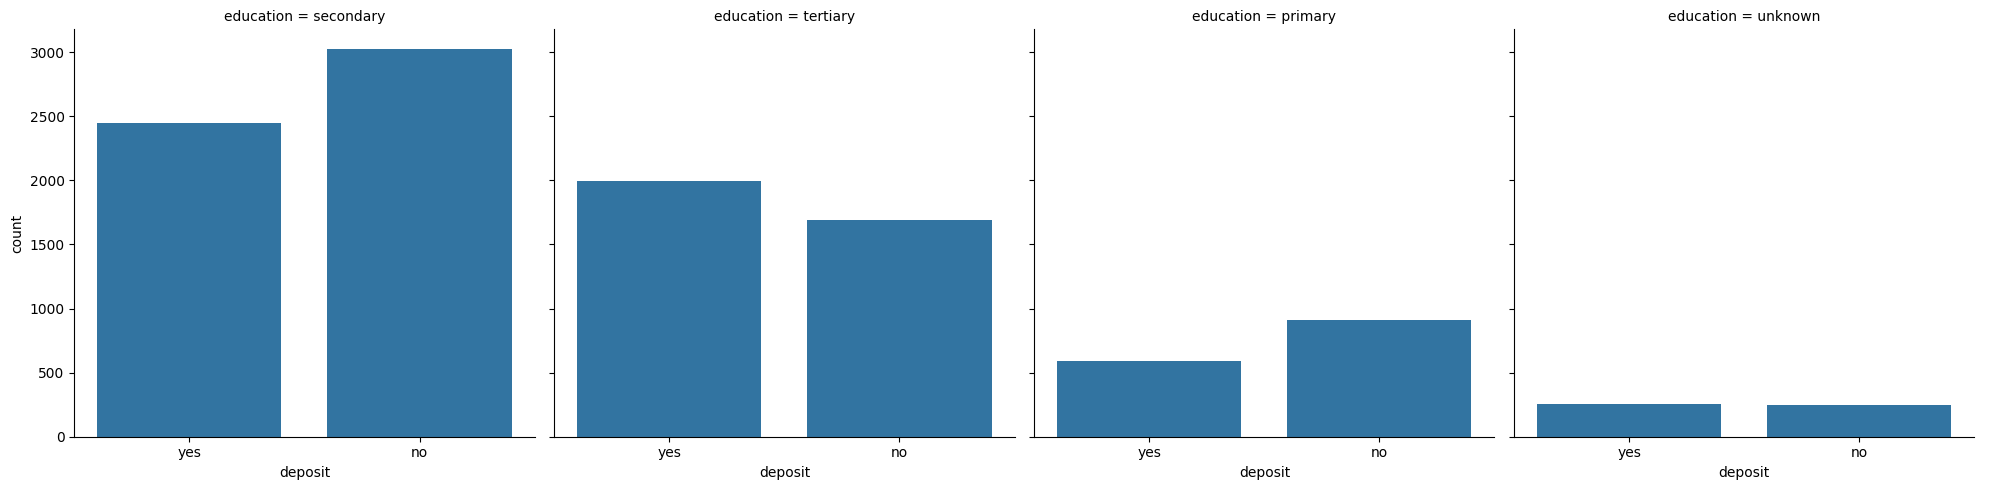

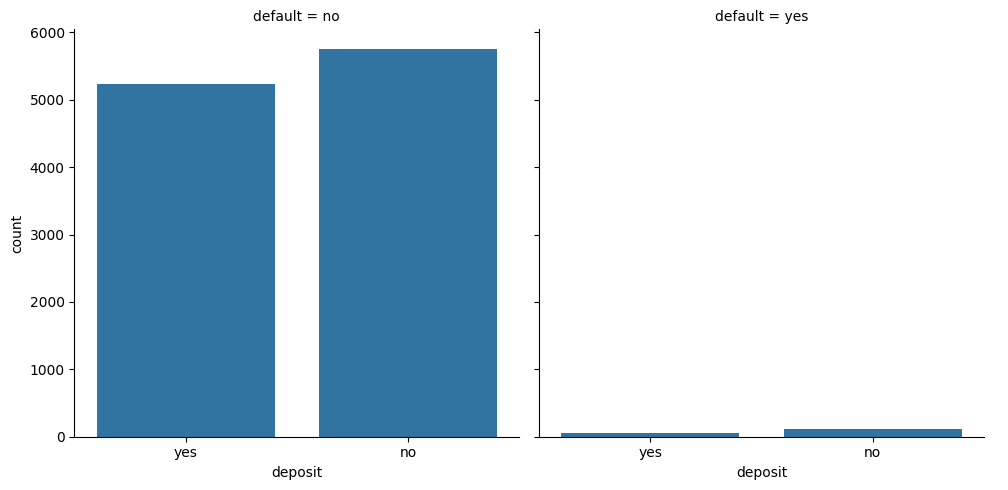

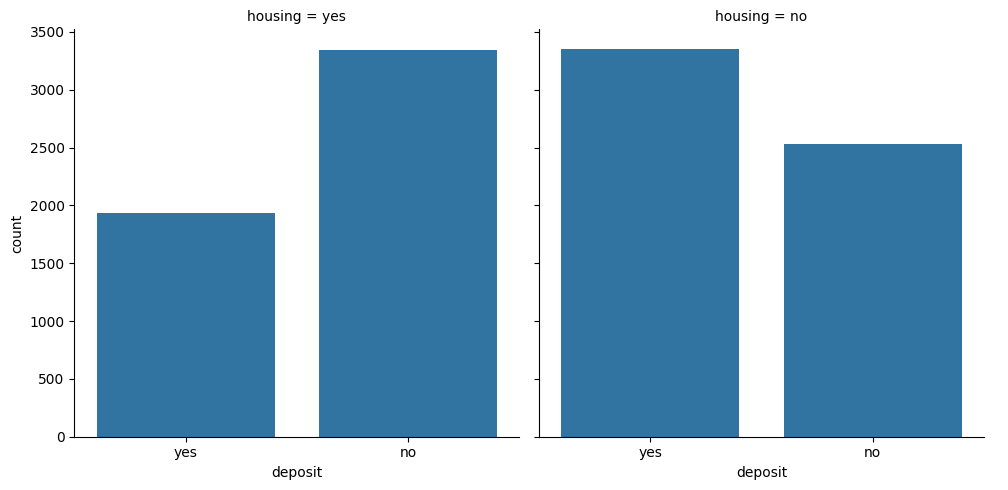

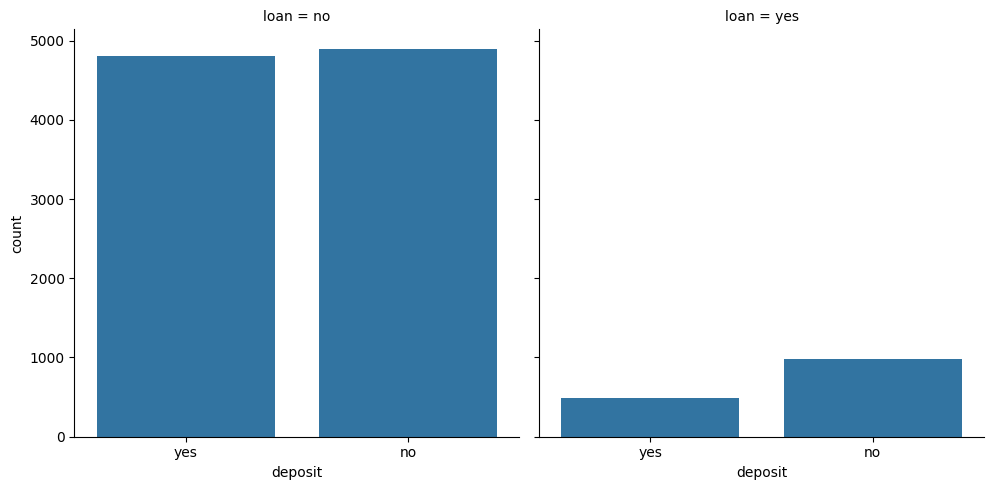

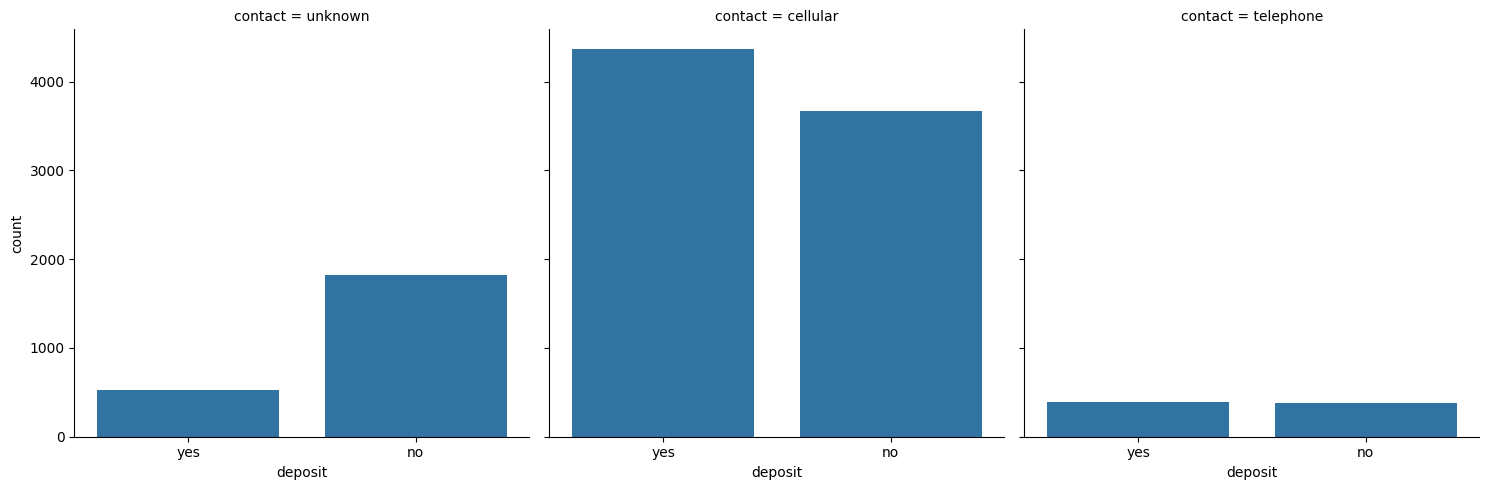

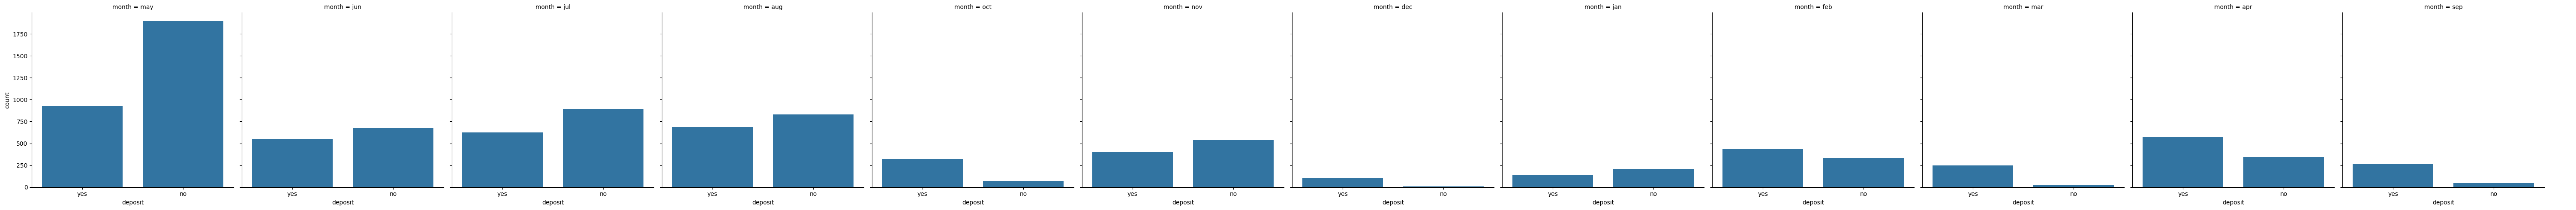

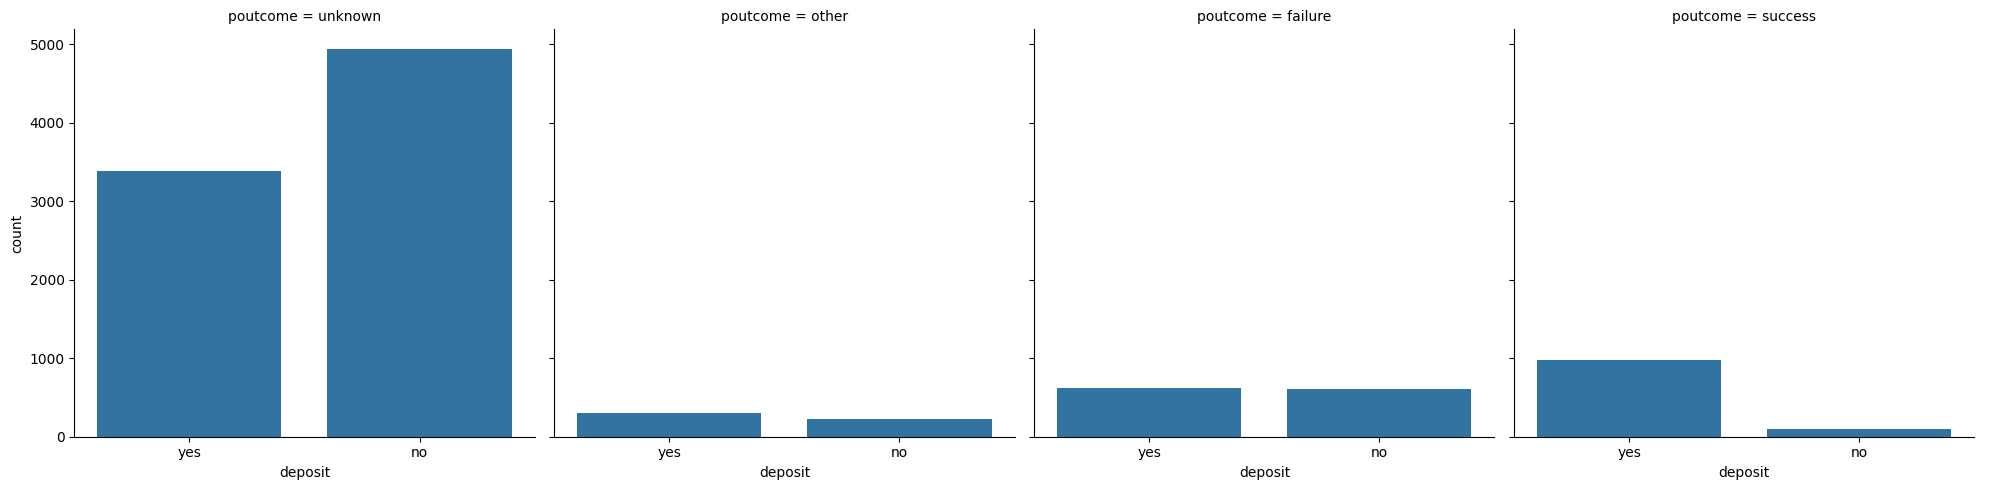

In [27]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

In [33]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

**7. Explore the Numerical Features**

In [37]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


**8. Find Discrete Numerical Features**

In [38]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**10. Find Continous Numerical Features**

In [39]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


**11. Distribution of Continous Numerical Features**

/tmp/ipython-input-40-974582242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
/tmp/ipython-input-40-974582242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
/tmp/ipython-input-40-974582242.py:6: UserWarning: 

`distplot` is a deprecated 

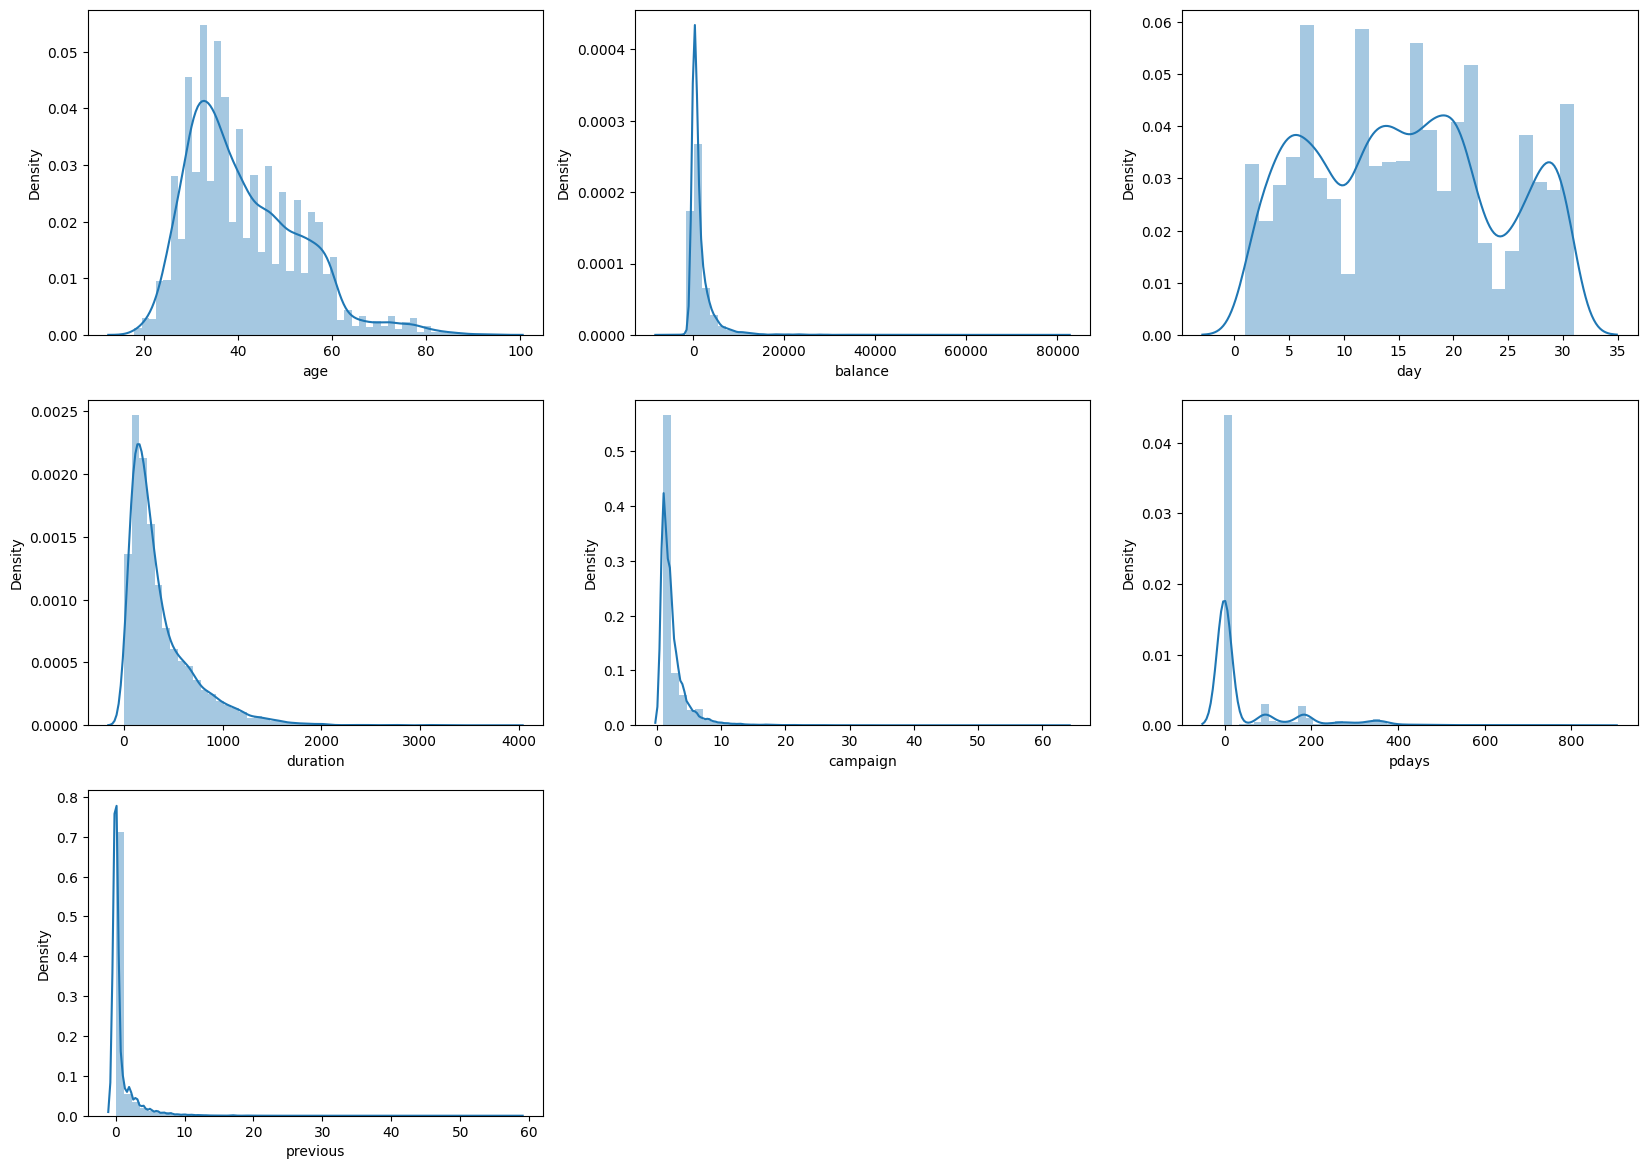

In [40]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**12. Relation between Continous numerical Features and Labels**

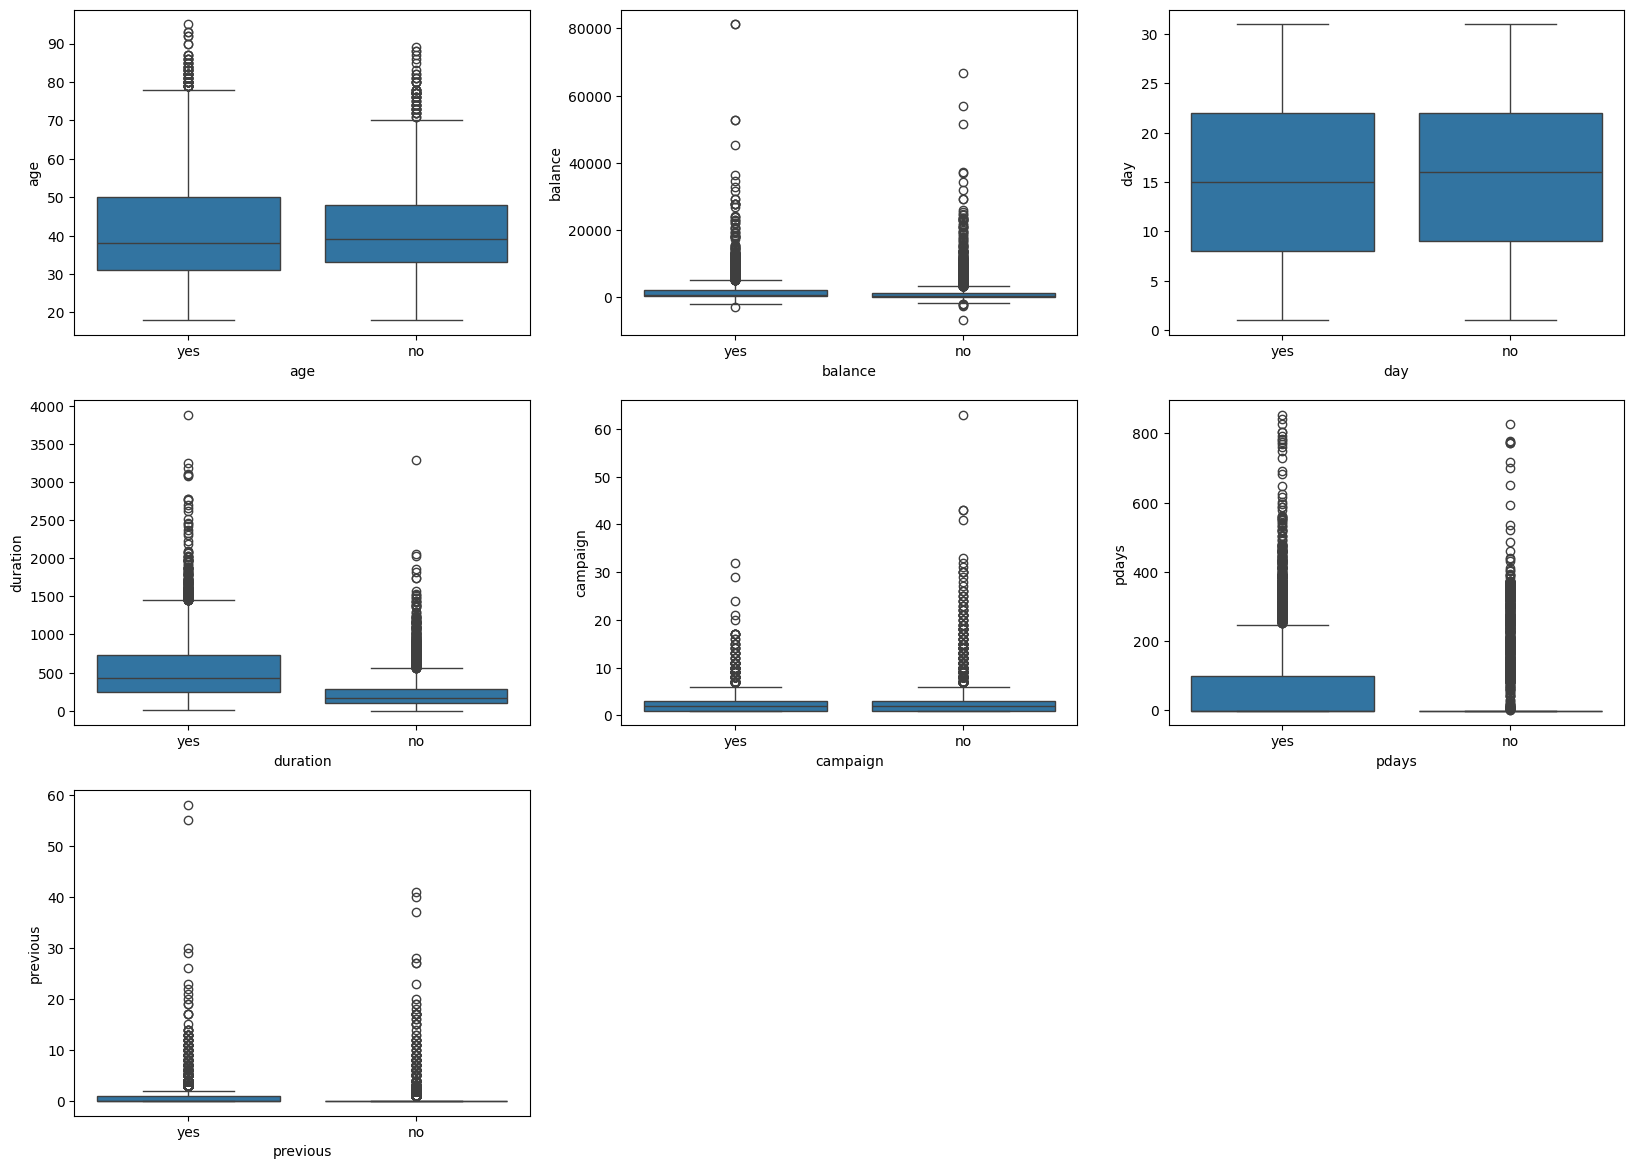

In [41]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**13. Find Outliers in numerical features**

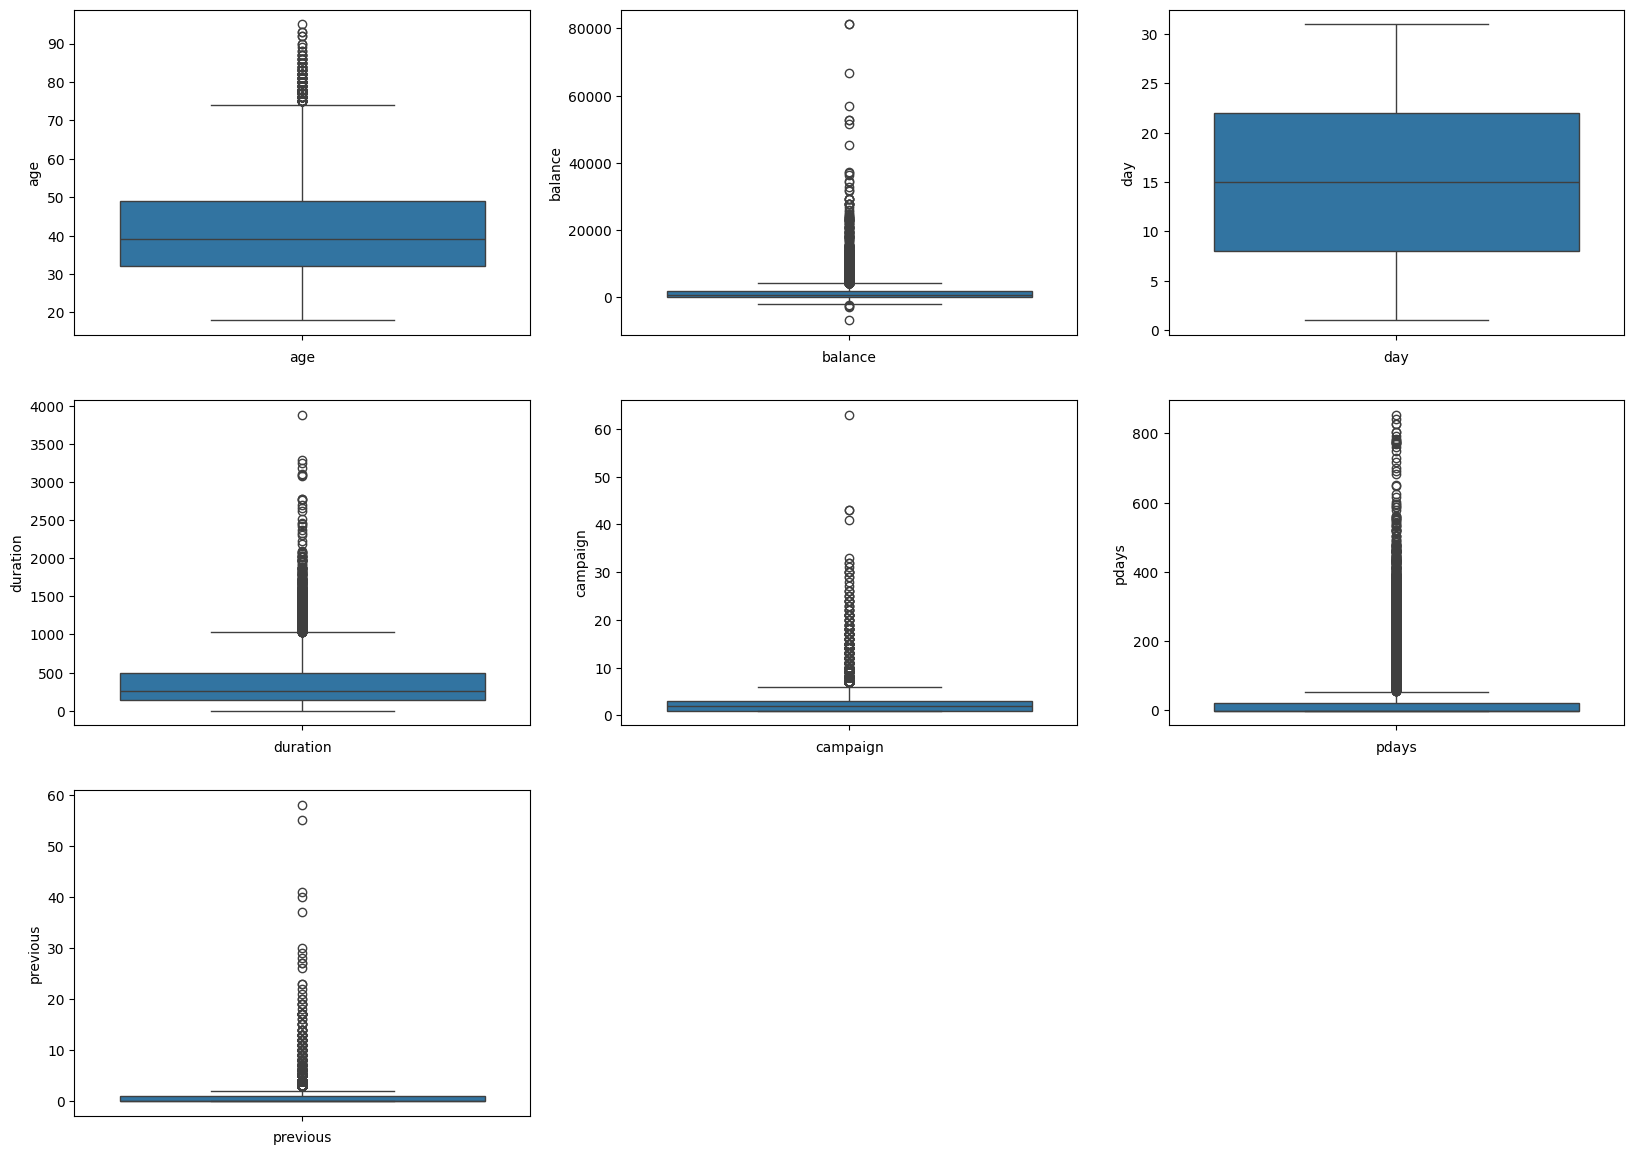

In [42]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**14. Explore the Correlation between numerical features**

<Axes: >

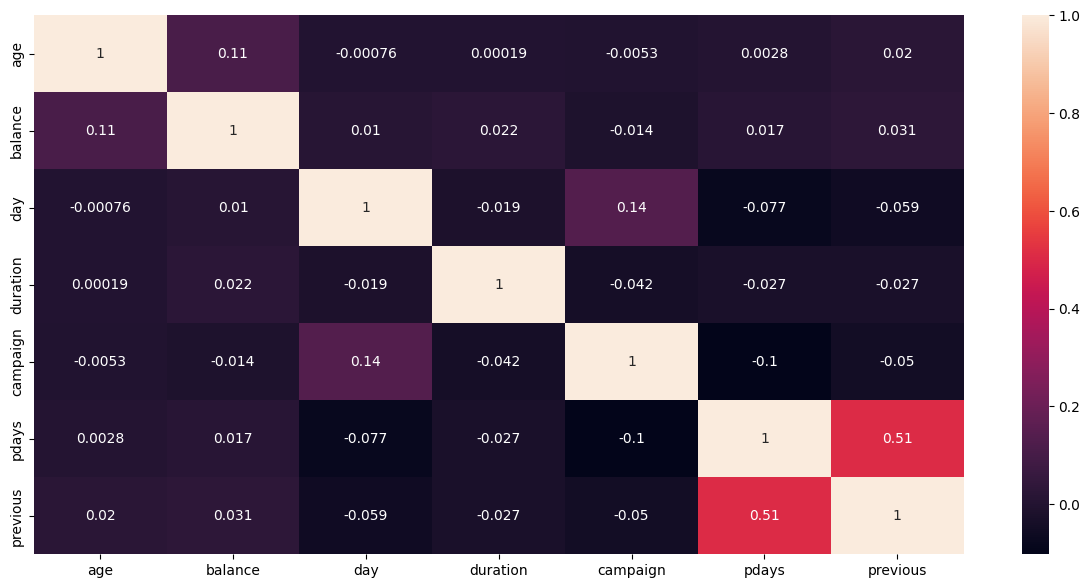

In [44]:
## Checking for correlation
cor_mat=df.select_dtypes(include=['number']).corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**15. Check the Data set is balanced or not based on target values in classification**

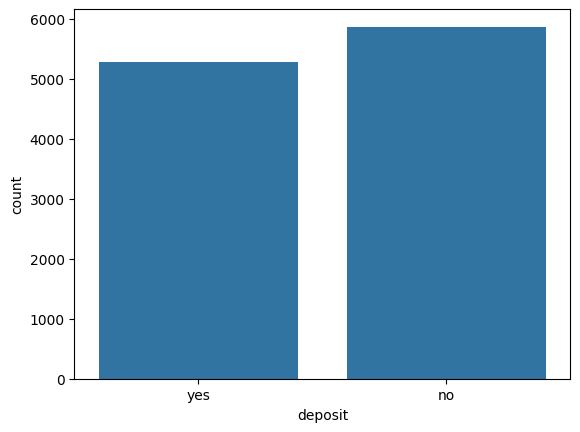

In [45]:
#total patient count based on cardio_results
sns.countplot(x='deposit',data=df)
plt.show()

In [46]:
df['deposit'].groupby(df['deposit']).count()

,deposit
deposit,
no,5873
yes,5289


In [47]:
df2=df.copy()

In [48]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [49]:
df2.shape

(11162, 17)

In [50]:
#defaut features does not play imp role
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [51]:
df2.drop(['default'],axis=1, inplace=True)

In [52]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [53]:
# drop pdays as it has -1 value for around 40%+
df2.drop(['pdays'],axis=1, inplace=True)

In [54]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

,age
age,
18,8
19,13
20,20
21,30
22,48
...,...
89,1
90,2
92,2


In [55]:
# remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [56]:
# remove outliers in feature duration...
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [57]:
# remove outliers in feature campaign...
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [58]:
df3 = df2[df2['campaign'] < 33]

In [59]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [60]:
# remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10            26
         11            15
         12            10
         13             9
         14             5
         15             1
         17             3
         19             2
         20             1
         21             1
         22             1
         23             1
         26             1
         29             1
         30             1
         55             1
         58             1
Name: previous, dtype: int64

In [61]:
df4 = df3[df3['previous'] < 31]

In [62]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [63]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [64]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,1
1,56,45,5,1467,1,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,1
2,41,1270,5,1389,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,1
3,55,2476,5,579,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,1
4,54,184,5,673,2,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,1


**Split Dataset into Training set and Test set**

In [65]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [66]:
len(X_train)

8921

In [67]:
len(X_test)

2231

# Model Selection

In [68]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85154062 0.84473094 0.84529148 0.85874439 0.85201794]
0.8504650739219455


In [70]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85658263 0.85762332 0.85313901 0.85650224 0.86154709]
0.8570788584492093


In [71]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [72]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

In [73]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': np.float64(0.7480369759182172),
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': np.float64(0.8151087509271114),
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}}]

# Model Building

In [74]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [75]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
model_xgb.score(X_test,y_test)

0.8565665620797849

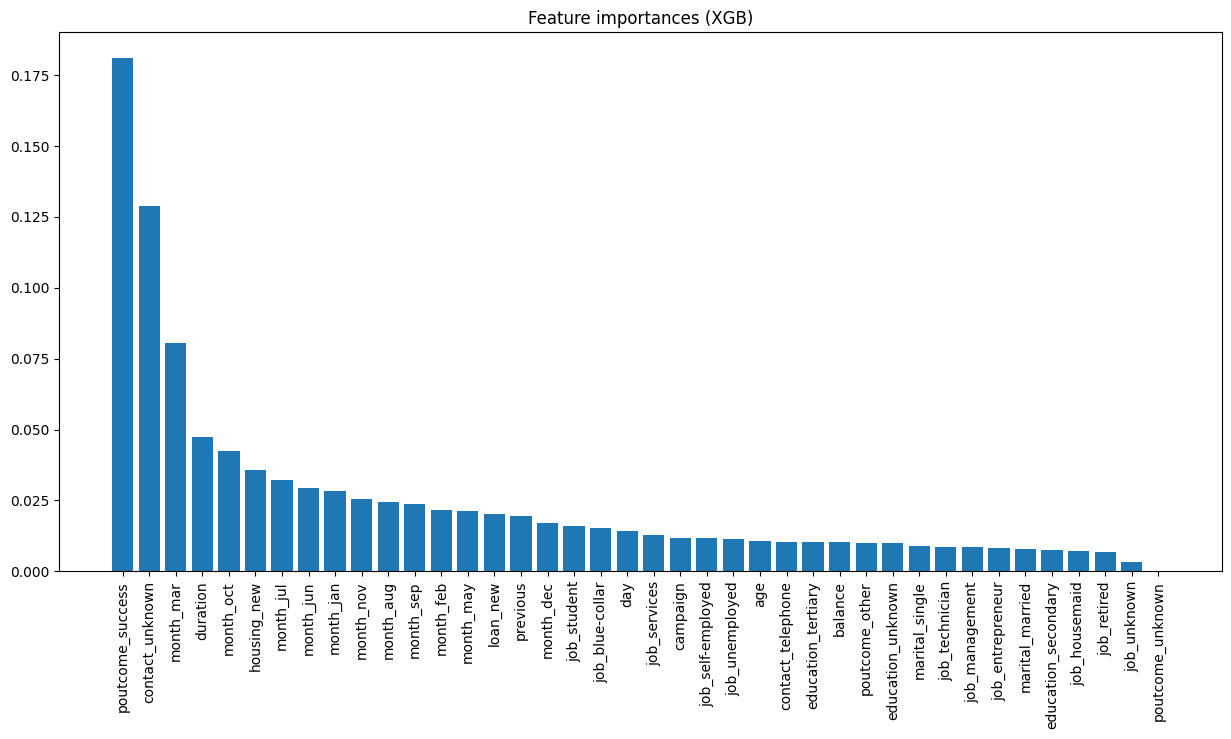

In [77]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [78]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[989, 190],
       [130, 922]])

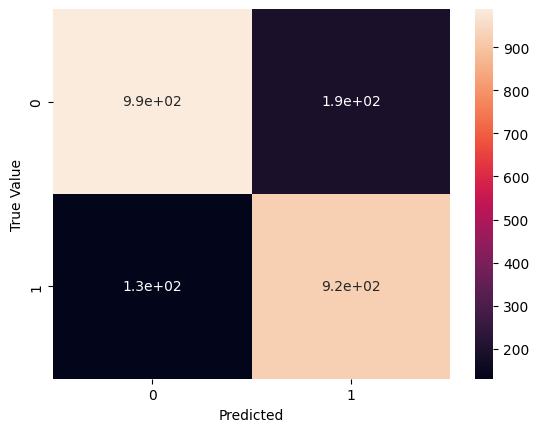

In [79]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

<Figure size 1500x1200 with 0 Axes>

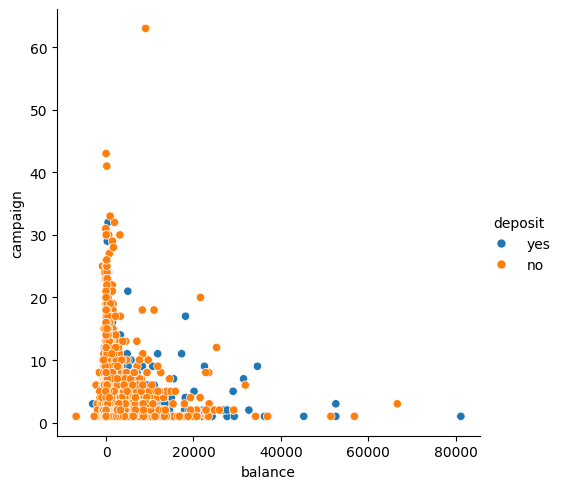

In [34]:
plt.figure(figsize=(15,12))
sns.relplot(data=df,x="balance",y="campaign",hue="deposit")

<Axes: >

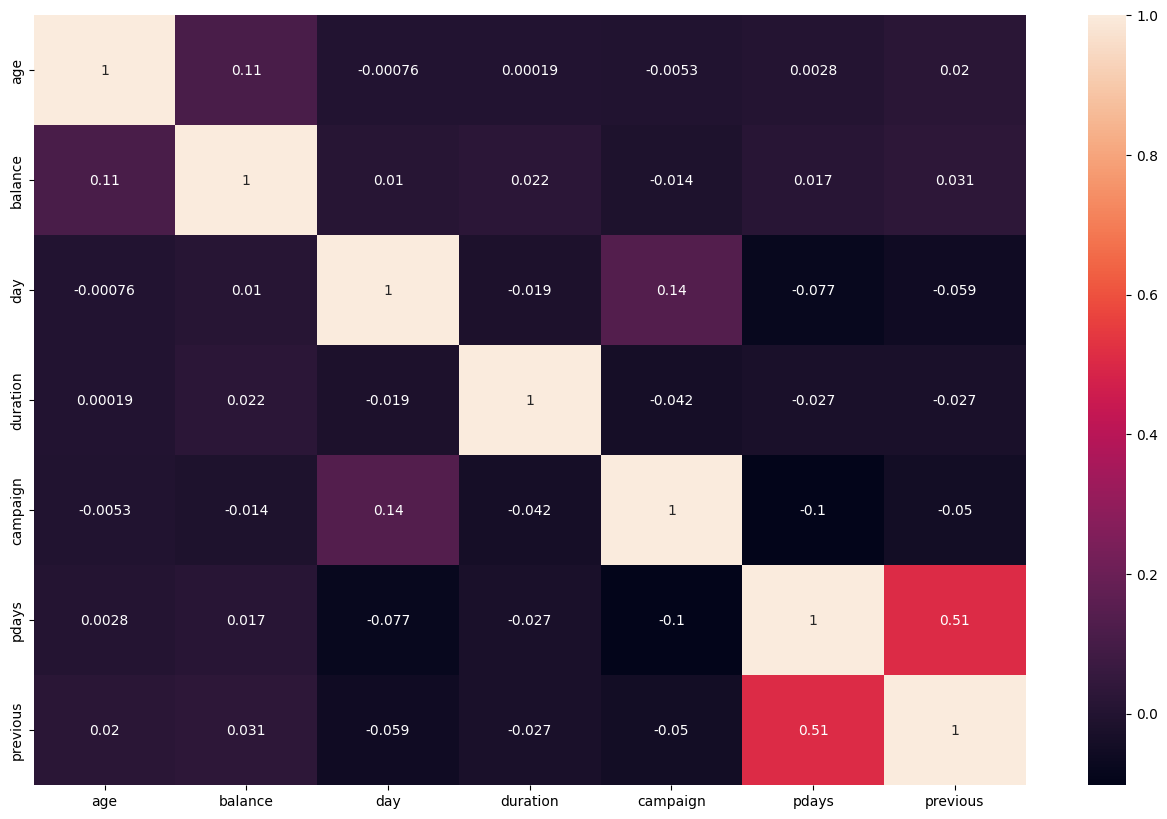

In [28]:
plt.figure(figsize=(16,10))
numeric_data = df.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(),annot=True)

<Figure size 1500x1200 with 0 Axes>

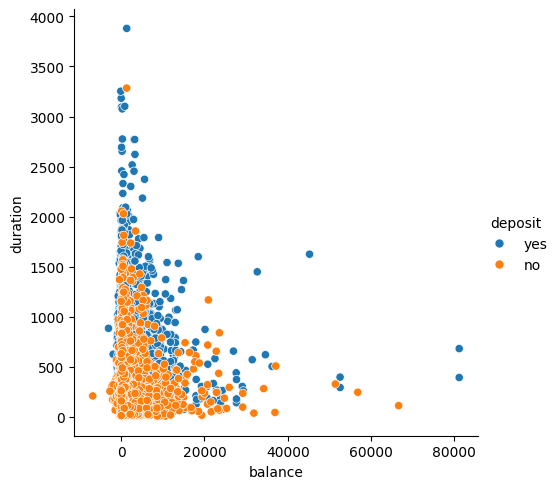

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
sns.relplot(data=df,x="balance",y="duration",hue="deposit")

Okay this 2 is more separable than others. Hovewer it isn't perfect.

<Figure size 1500x1200 with 0 Axes>

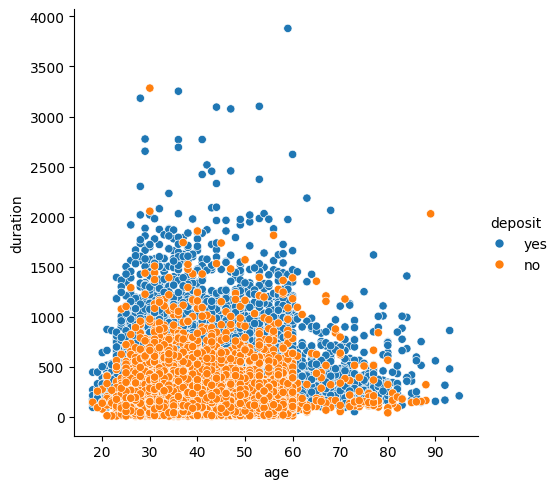

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
sns.relplot(data=df,x="age",y="duration",hue="deposit")

# Okay with these 3 feature (Age, Balance and Duration) we will have good results.

In [36]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

catb = CatBoostClassifier(iterations=1000,verbose=0)

scores_catb = cross_val_score(catb, x, y, cv=10)
print("Catboost")
print(scores_catb)

NameError: name 'y' is not defined

Worst better than naive bayes but also not that great. Okay we see classical train test split result.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(iterations=1000,verbose=0)

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1107  323]
 [ 368  993]]
0.7524184879971336


Okay only 3 feature and result is fine. Accuracy is %75.

#With all the features:

In [ ]:
x_full=data.iloc[:,0:16]
xfull_train, xfull_test, y_train, y_test = train_test_split(x_full, y, test_size=0.25, random_state=142)

categorical_features_indices = np.where(x_full.dtypes != np.float64)[0]

catb = CatBoostClassifier(iterations=1000,verbose=0,cat_features=categorical_features_indices)

catb.fit(xfull_train,y_train)
ypred=catb.predict(xfull_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1169  261]
 [ 131 1230]]
0.8595485489072017


With all features. Accuracy is %85 and confusion matrix also looks just fine.

In [ ]:
catb = CatBoostClassifier(verbose=0,cat_features=categorical_features_indices)

catb.fit(xfull_train,y_train)
ypred=catb.predict(xfull_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1169  261]
 [ 131 1230]]
0.8595485489072017


# Okay, Categorical variables have important informations. Add some Categorical features too our 3 feature model.

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_numeric
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,0


Add marital status and loan effected most I think.

In [ ]:
x=data[["age","duration","balance","marital","loan"]]
y=data["deposit_numeric"]


catb = CatBoostClassifier(verbose=0,cat_features=[3,4])

scores_catb = cross_val_score(catb, x, y, cv=10)
print("Catboost")
print(scores_catb)

Catboost
[0.87197851 0.83616831 0.71953405 0.78763441 0.68727599 0.7078853
 0.72222222 0.74641577 0.73655914 0.74910394]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(verbose=0,cat_features=[3,4])

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1114  316]
 [ 350 1011]]
0.7613758509494805


Slightly better maybe job is the most important categorical features.

In [ ]:
x=data[["age","duration","balance","marital","loan","job"]]
y=data["deposit_numeric"]


catb = CatBoostClassifier(verbose=0,cat_features=[3,4,5])

scores_catb = cross_val_score(catb, x, y, cv=10)
print("Catboost")
print(scores_catb)

Catboost
[0.86392122 0.83795882 0.7374552  0.79032258 0.70071685 0.72580645
 0.73476703 0.76702509 0.75179211 0.75716846]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(verbose=0,cat_features=[3,4,5])

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1114  316]
 [ 323 1038]]
0.7710498029380151


# Now Delete Marital and loan features and only use job categorical variable.

In [ ]:
x=data[["age","duration","balance","job"]]
y=data["deposit_numeric"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(verbose=0,cat_features=[3])

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1107  323]
 [ 326 1035]]
0.7674668577570763


Now we add education.

In [ ]:
x=data[["age","duration","balance","job","education"]]
y=data["deposit_numeric"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(verbose=0,cat_features=[3,4])

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1116  314]
 [ 322 1039]]
0.7721246864922967


In [ ]:
x=data[["age","duration","balance","job","education","housing"]]
y=data["deposit_numeric"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(verbose=0,cat_features=[3,4,5])

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1132  298]
 [ 296 1065]]
0.7871730562522393


In [ ]:
x=data[["age","duration","balance","job","education","housing","marital"]]
y=data["deposit_numeric"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(verbose=0,cat_features=[3,4,5,6])

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1137  293]
 [ 284 1077]]
0.7932640630598352


In [ ]:
x=data[["age","duration","balance","campaign","job","education","housing","marital"]]
y=data["deposit_numeric"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(verbose=0,cat_features=[4,5,6,7])

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1137  293]
 [ 274 1087]]
0.7968470082407739


In [ ]:
importances=catb.get_feature_importance()
features=["age","duration","balance","campaign","job","education","housing","marital"]
for i in range(0,len(importances)):
    print(features[i],": ",importances[i])

age :  11.247093804470277
duration :  35.97616429183293
balance :  13.00804307821139
campaign :  7.648018080844144
job :  11.038902142669766
education :  7.799440974495051
housing :  7.787559236855779
marital :  5.494778390620773


# Duration is the most important featues. First five feature leads all features. Job is more important than education and marital.

Campaign also not that important.

In [ ]:
x=data[["age","duration","balance","pdays","job","education","housing"]]
y=data["deposit_numeric"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=142)
catb = CatBoostClassifier(verbose=0,cat_features=[4,5,6])

catb.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))

[[1189  241]
 [ 273 1088]]
0.8158366176997492


In [ ]:
importances=catb.get_feature_importance()
features=x.columns
for i in range(0,len(importances)):
    print(features[i],": ",importances[i])

age :  11.28822854618085
duration :  35.79920109263273
balance :  11.697724501001334
pdays :  16.565350644617347
job :  9.167527691826152
education :  6.810427593862352
housing :  8.671539929879248


Pdays also an important column. Duration and Pdays is the most important features. Also with these 7 features we %81.5 accuracy. İt is better than I expected. This model is usable enough.

In [ ]:
catb.save_model("model7features")

Thanks for Reading :)

In [ ]:
x = df[['age', 'duration', 'balance']]
y = df['deposit']